In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_stock_data = pd.read_csv('/kaggle/input/amazon-stock-price-from-1999-to-2022/AMZN_data_1999_2022.csv')

In [3]:
amazon_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000
1,1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000
2,1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000
3,1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000
4,1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000


In [4]:
amazon_stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6034,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
6035,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
6036,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
6037,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
6038,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200


In [5]:
amazon_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6039 non-null   object 
 1   Open       6039 non-null   float64
 2   High       6039 non-null   float64
 3   Low        6039 non-null   float64
 4   Close      6039 non-null   float64
 5   Adj Close  6039 non-null   float64
 6   Volume     6039 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.4+ KB


In [6]:
amazon_stock_data['Date'] = pd.to_datetime(amazon_stock_data['Date'])

In [7]:
amazon_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6039 non-null   datetime64[ns]
 1   Open       6039 non-null   float64       
 2   High       6039 non-null   float64       
 3   Low        6039 non-null   float64       
 4   Close      6039 non-null   float64       
 5   Adj Close  6039 non-null   float64       
 6   Volume     6039 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.4 KB


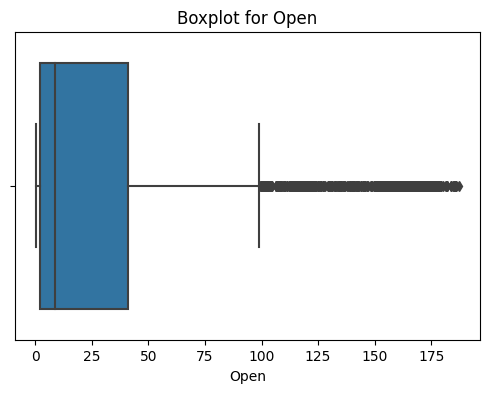

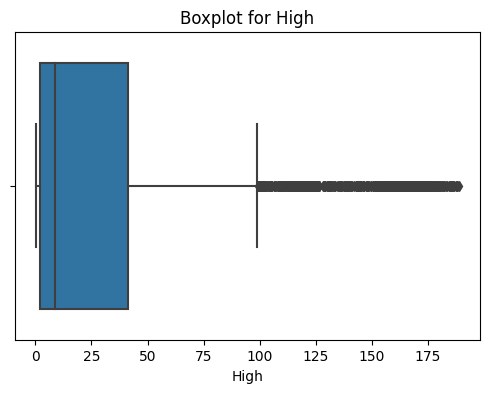

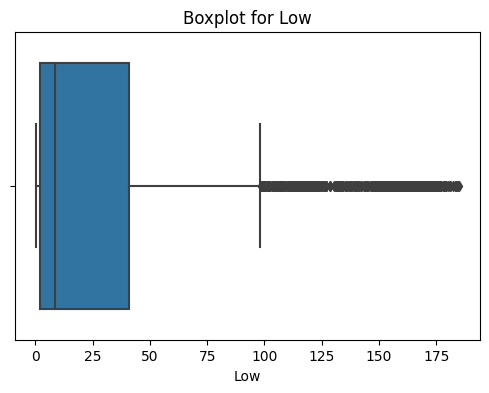

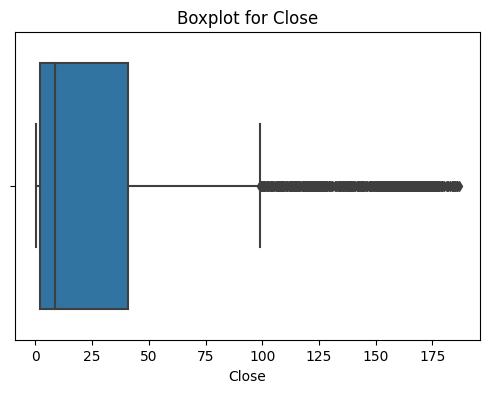

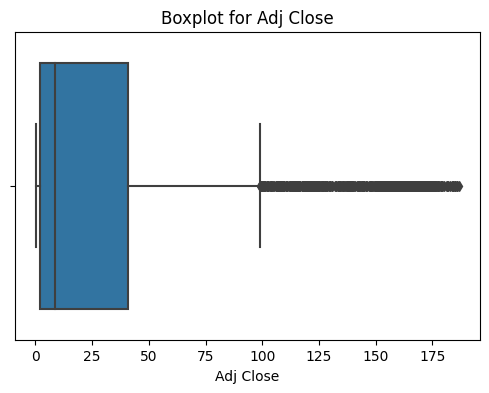

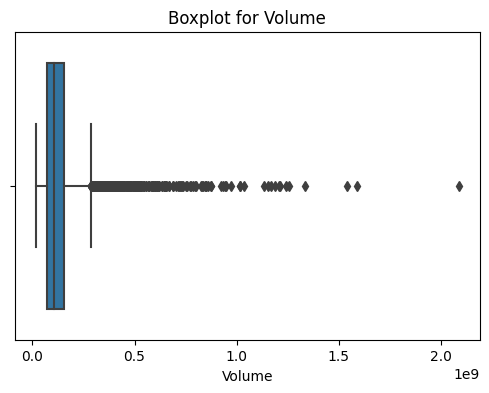

In [8]:
# plt.figure(figsize=(10, 6))

# # Plotting boxplots for each column in the DataFrame
# sns.boxplot(data=amazon_stock_data)
# plt.title('Boxplot for Amazon Stock Price Columns')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
# plt.show()

for i, column in enumerate(amazon_stock_data.columns[1:]):
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(x=amazon_stock_data[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [9]:
def handle_outliers(column):
    Q1 = amazon_stock_data[column].quantile(0.25)
    Q3 = amazon_stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    amazon_stock_data[column] = amazon_stock_data[column].clip(lower=lower_bound, upper=upper_bound)

In [10]:
# Exclude 'Date' column from handling outliers
for column in amazon_stock_data.columns[1:]:
    handle_outliers(column)

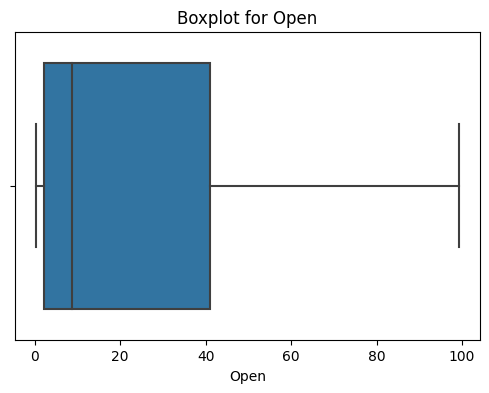

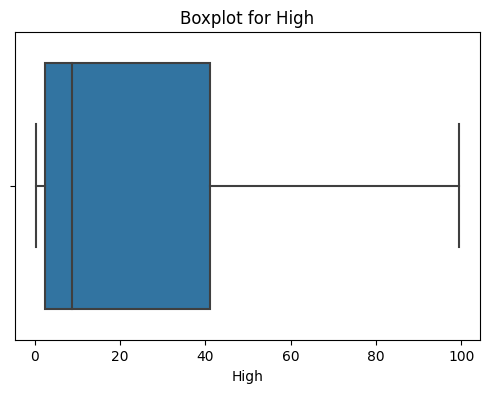

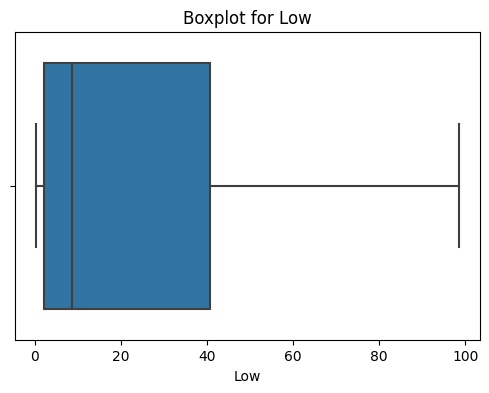

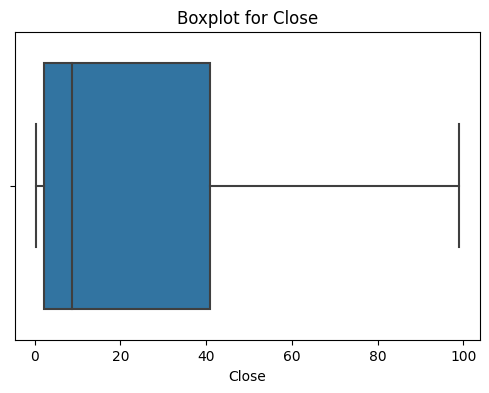

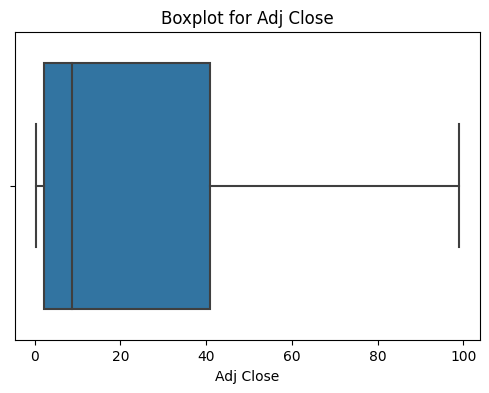

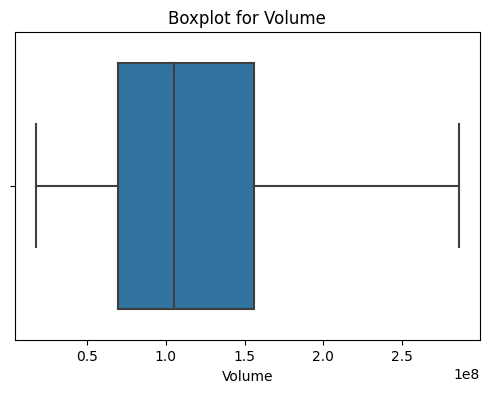

In [11]:
for i, column in enumerate(amazon_stock_data.columns[1:]):
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(x=amazon_stock_data[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

Text(0, 0.5, 'Closing Price')

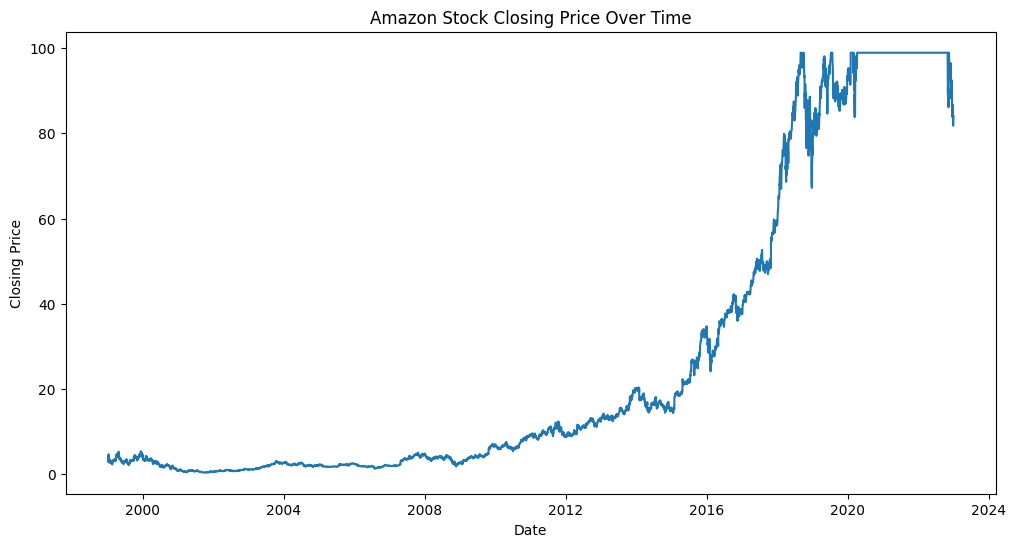

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=amazon_stock_data, x='Date', y='Close')
plt.title("Amazon Stock Closing Price Over Time")
plt.ylabel('Closing Price')